In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_cells_positions, plot_cev_radius, plot_stacked_var_radius, radius_pc_variance_contourf

In [3]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
METHOD = 'abs'
PCA_SCALED = False
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [4]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root="../../output") for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

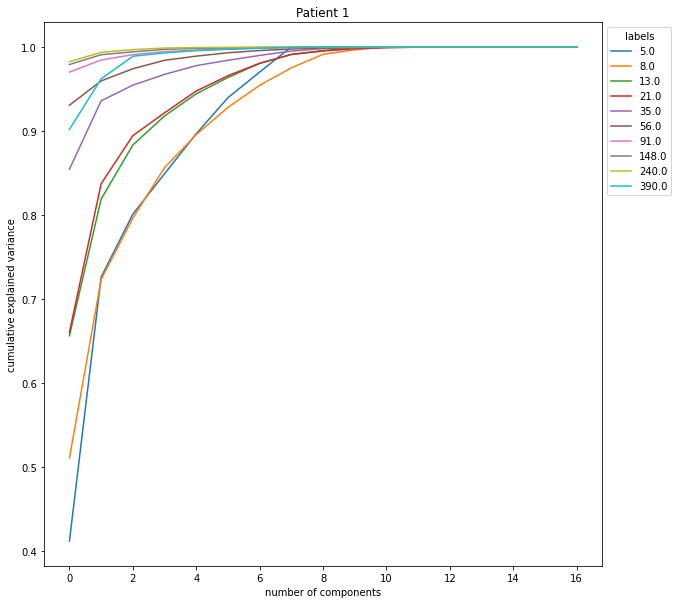

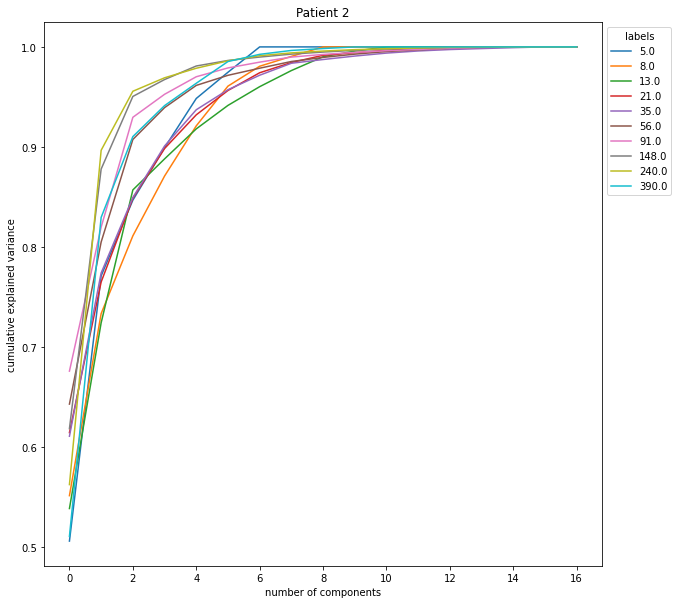

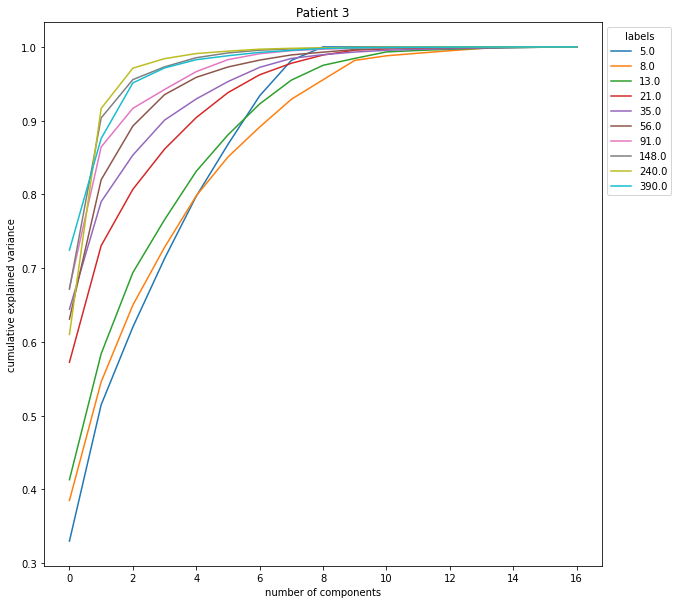

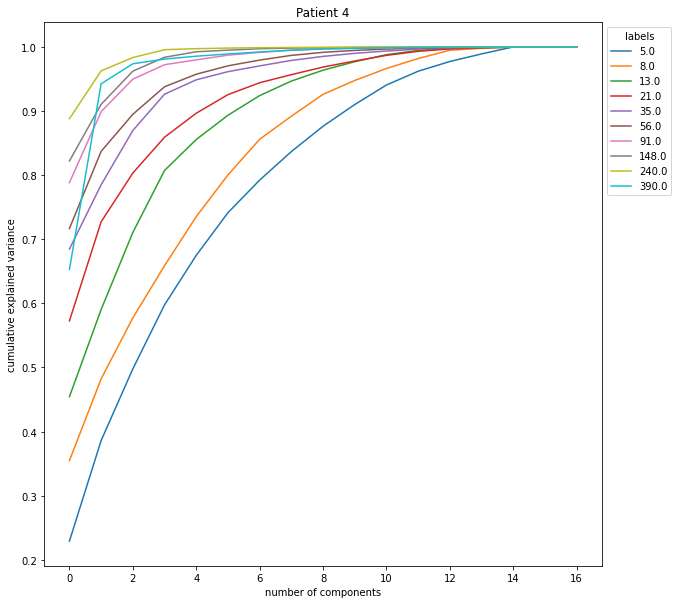

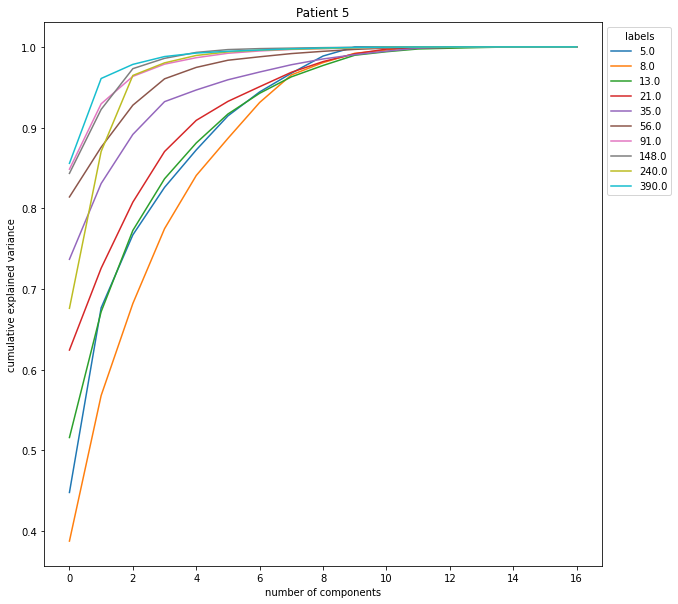

In [5]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [6]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [7]:
expl_var_ratio

{1: {5.0: array([4.11625912e-01, 3.14271788e-01, 7.49952522e-02, 4.80955937e-02,
         4.77103242e-02, 4.28102559e-02, 3.05749517e-02, 2.99159221e-02,
         2.27525064e-34, 5.10284956e-37, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  8.0: array([5.10601583e-01, 2.12553636e-01, 7.30635375e-02, 6.01196627e-02,
         3.92680101e-02, 3.24529425e-02, 2.62268376e-02, 2.08200034e-02,
         1.60670912e-02, 5.39443559e-03, 3.43226092e-03, 4.13869778e-35,
         1.55026421e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([6.56098463e-01, 1.62691271e-01, 6.44547117e-02, 3.45234830e-02,
         2.63942293e-02, 1.94581878e-02, 1.67303524e-02, 1.07290550e-02,
         4.54292716e-03, 3.25542584e-03, 1.12189393e-03, 9.40080823e-35,
         1.52933261e-35, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  21.0: array([6.6037877

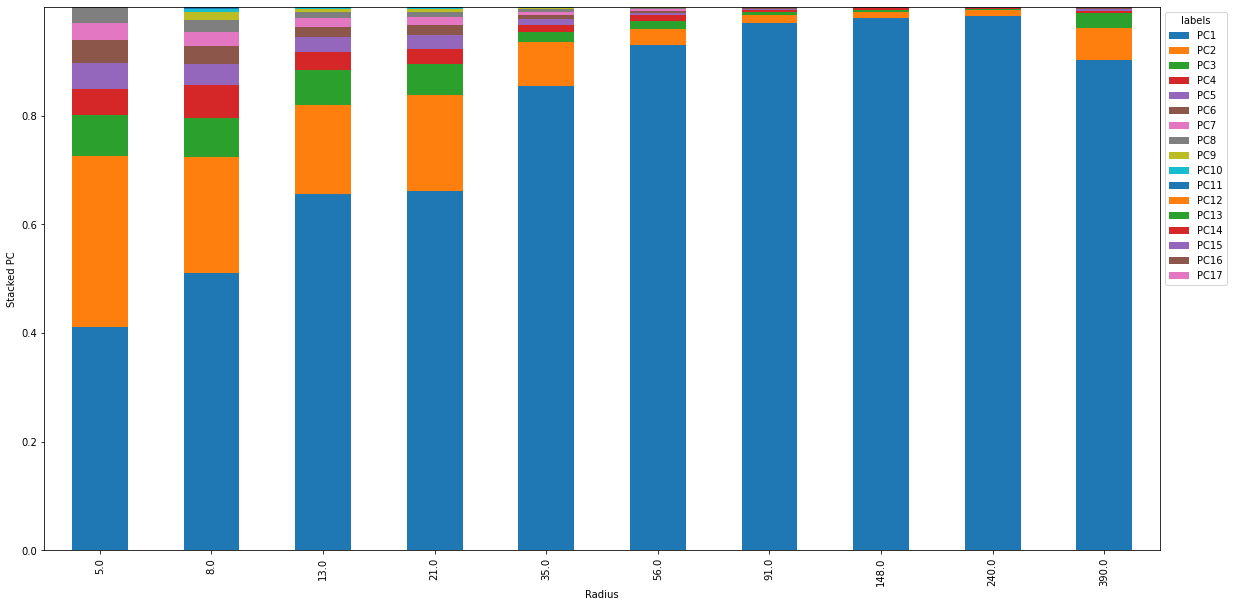

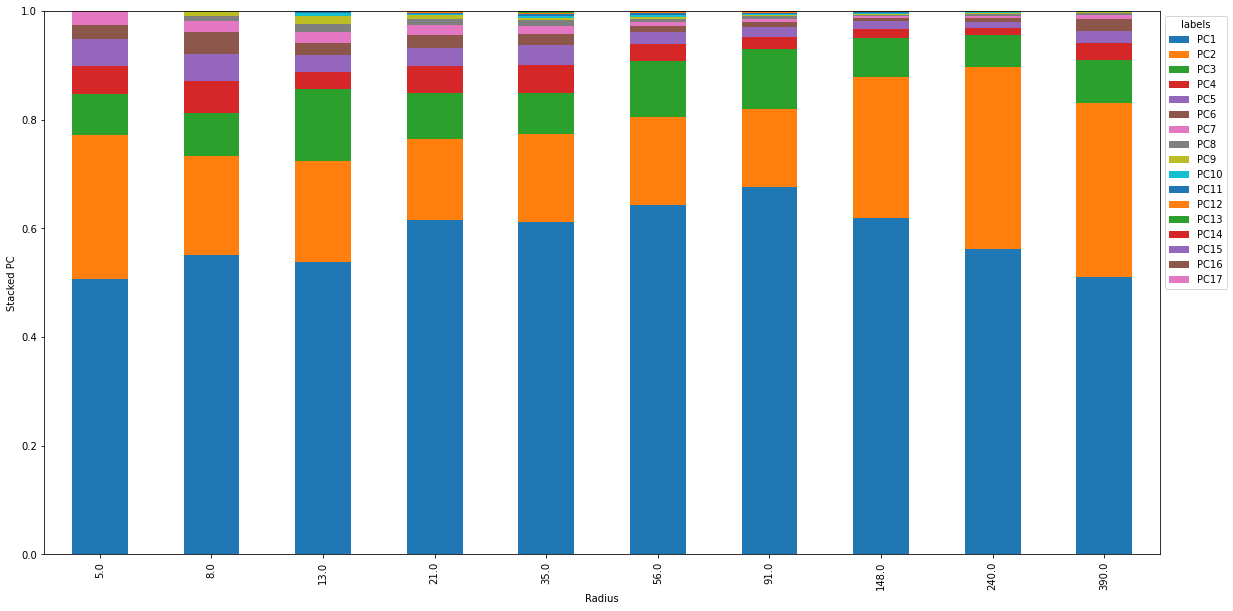

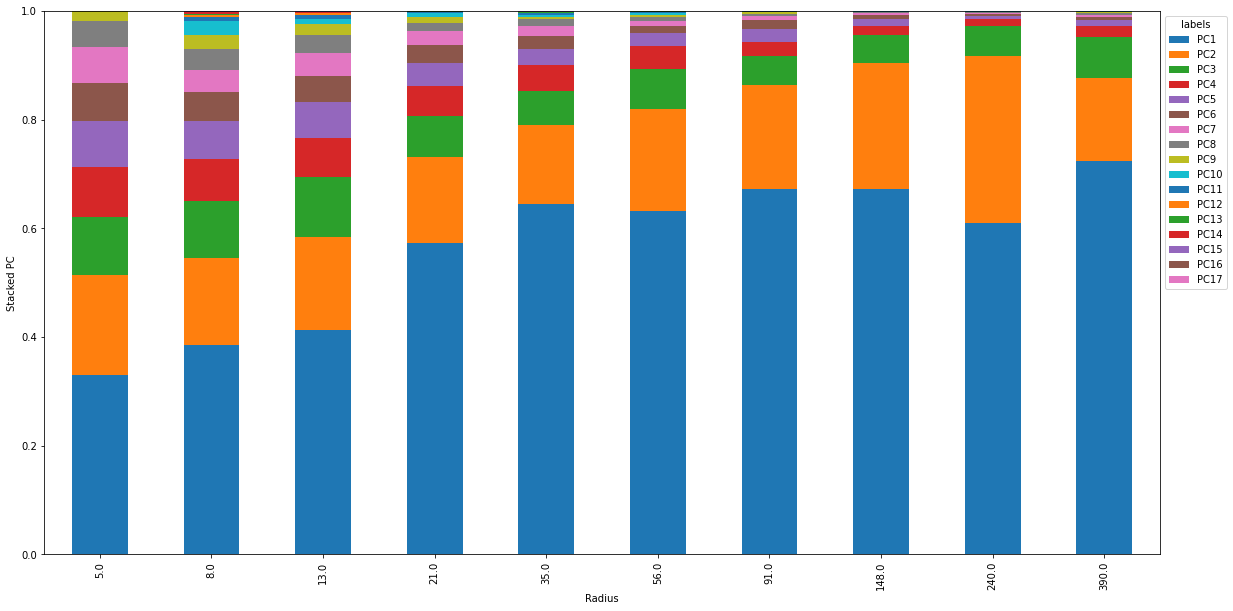

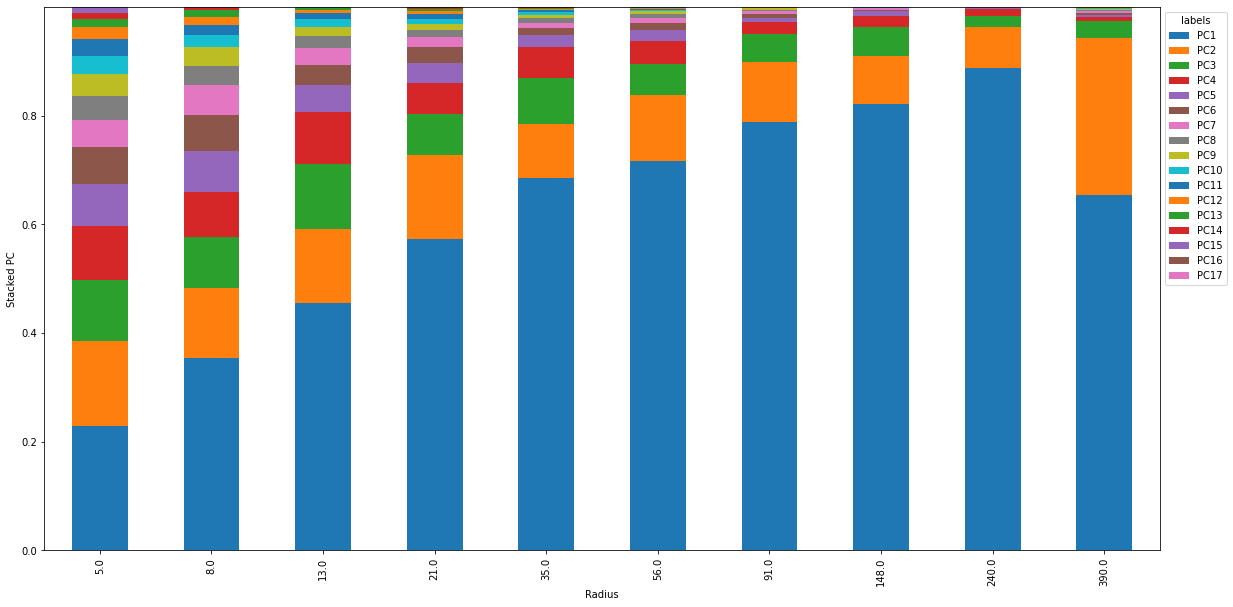

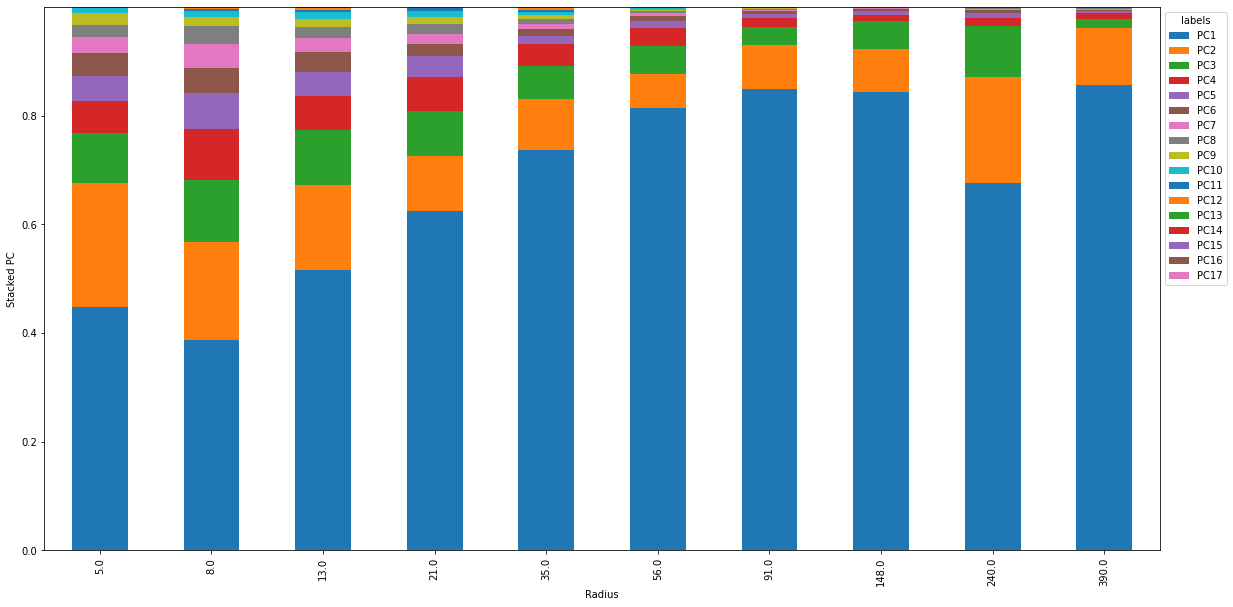

In [8]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

In [5]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root="../../output") for r in radius} for p in full_patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)
expl_var_ratio = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}


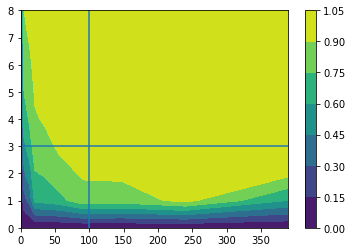

In [10]:
def get_explained_variance_matrix(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    for i, x in enumerate(X.T):
        if x[0] != 0:
            z[:, i] = np.insert(expl_var_ratio[p][x[0]], 0, 0.0)
        else:
            z[:, i] = np.zeros(18)
    
    return z
    
p = 4
x = [0] + list(expl_var_ratio[p].keys())
y = np.arange(0, 18)
X, Y = np.meshgrid(x, y)
Z = get_explained_variance_matrix(X, Y, expl_var_ratio)
plt.contourf(X, Y, Z)
plt.axvline(x=100)
plt.axhline(y=3)
plt.ylim(0, 8)
plt.colorbar()
plt.show()

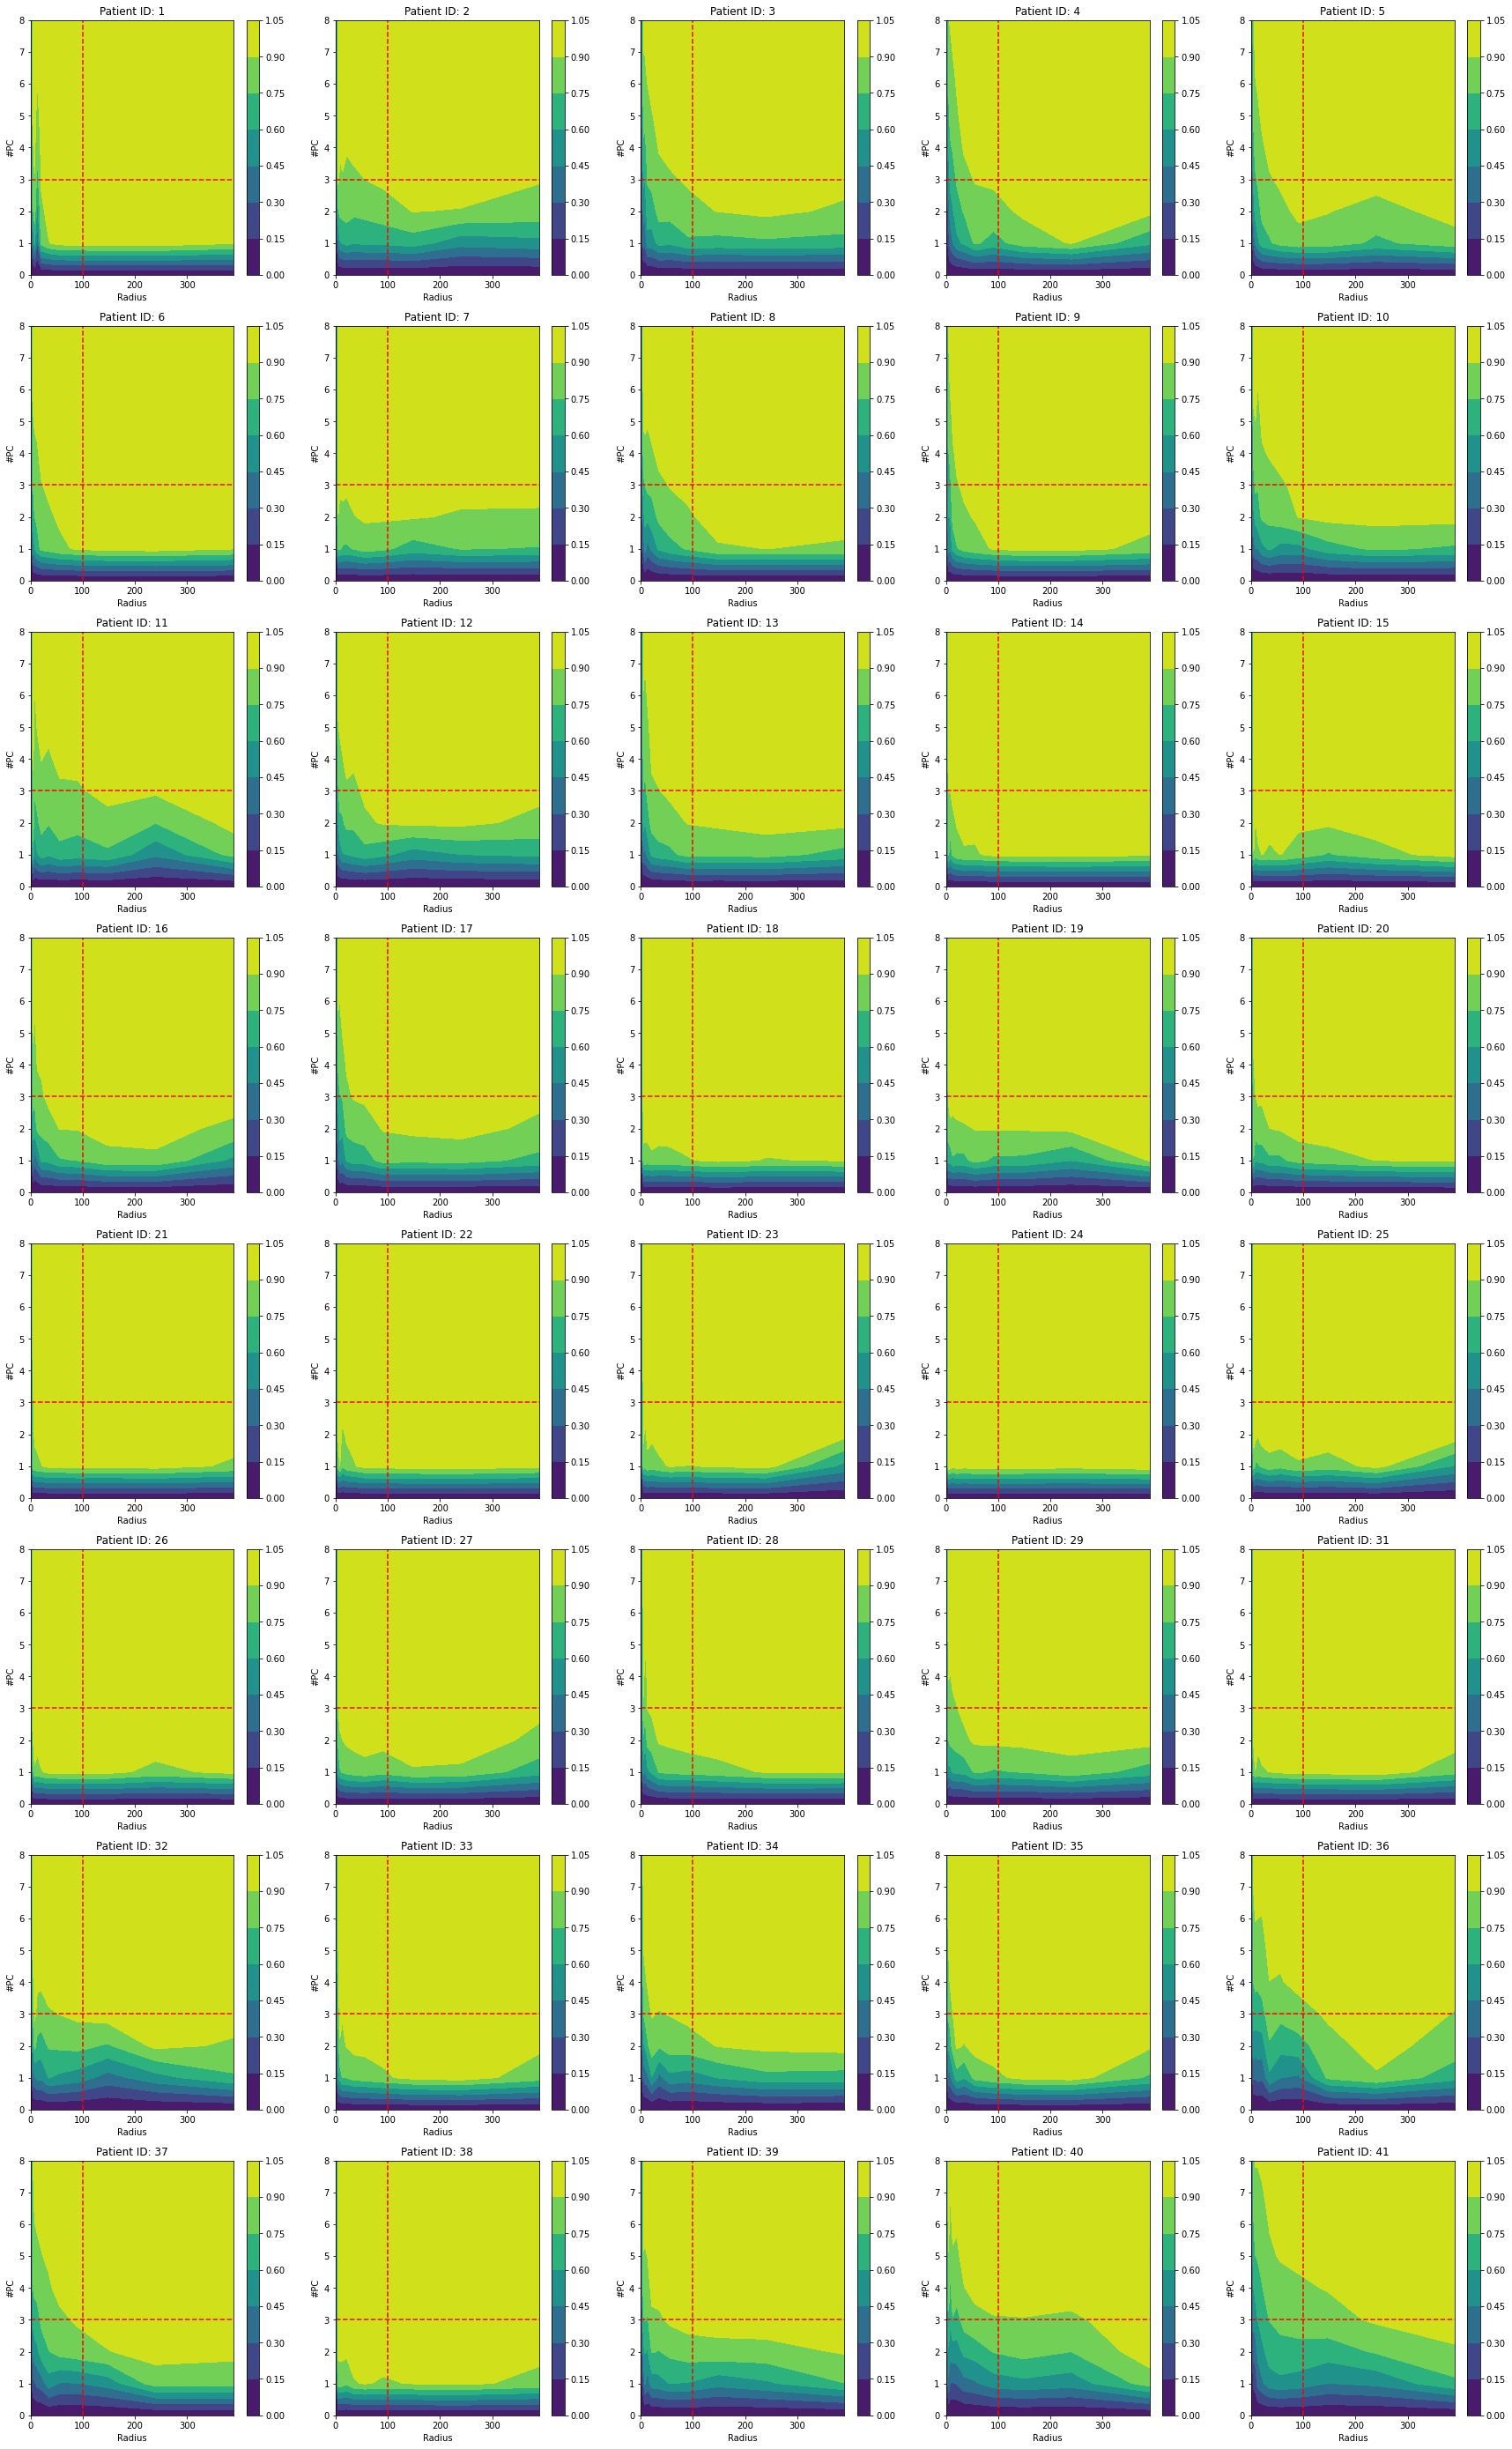

In [6]:
radius_pc_variance_contourf(full_patient_ids, expl_var_ratio)